## IMDB, binary classification example
Page 68 and after

In [47]:
from keras.datasets import imdb

In [48]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [49]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [50]:
train_labels[0]

1

In [51]:
max([max(sequence) for sequence in train_data])

9999

In [52]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [53]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [54]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [55]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building the Model

In [56]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Configuring the optimizers

In [58]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

##### Validating the approach

In [60]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Let's go train it

In [61]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 366us/step - loss: 0.5337 - acc: 0.7950 - val_loss: 0.4113 - val_acc: 0.8670
Epoch 2/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.3322 - acc: 0.8970 - val_loss: 0.3256 - val_acc: 0.8810
Epoch 3/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.2430 - acc: 0.9242 - val_loss: 0.2846 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.1894 - acc: 0.9383 - val_loss: 0.2753 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.1527 - acc: 0.9509 - val_loss: 0.2887 - val_acc: 0.8837
Epoch 6/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1239 - acc: 0.9613 - val_loss: 0.2937 - val_acc: 0.8830
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1008 - acc: 0.9715 - val_loss: 0.3033 - 

In [62]:
history_dict = history.history
history_dict.keys()

acc = history_dict['acc']

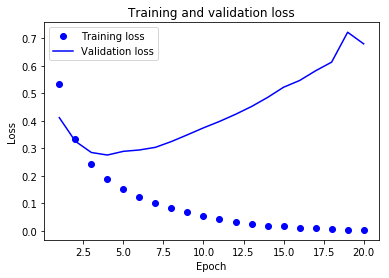

In [63]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' = "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' = "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

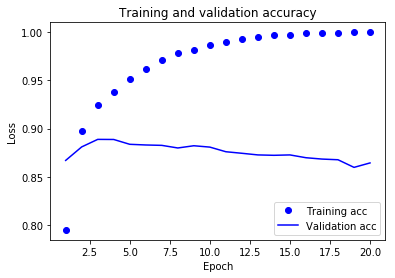

In [65]:
plt.clf()  # Clear Figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # 'bo' = "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')  # 'b' = "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Retraining the model from scratch

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, 
          y_train,
          epochs=4,
          batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.4461 - acc: 0.8232
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2599 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.1989 - acc: 0.9288
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


[0.324415995759964, 0.87256]

In [68]:
model.predict(x_test)

array([[0.25465417],
       [0.9996412 ],
       [0.9696815 ],
       ...,
       [0.158714  ],
       [0.13390034],
       [0.7386311 ]], dtype=float32)